## **!! Some research / guidelines suggest 5-min (2-5) windows for frequency features in healthy cases, even shorter ones (1-2) in real time applications**

In [86]:
import sys
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import pyhrv.frequency_domain as fd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, Akima1DInterpolator

sys.path.append("../file_loader")
sys.path.append("../preprocessing-block")
sys.path.append("../features_calculation")

import ecg_file_loader
from ecg_file_loader import ECGFileLoader

import rpeaks_finder
from rpeaks_finder import *

import ectopic_beats_filtering
from ectopic_beats_filtering import *

import frequency_features
from frequency_features import *

reload(ecg_file_loader)
reload(rpeaks_finder)
reload(ectopic_beats_filtering)
reload(frequency_features)

<module 'frequency_features' from '/Users/ashleyandrea/Documents/StartUps/seizury/seizure-block-codes/check_codes/../features_calculation/frequency_features.py'>

In [61]:
loader = ECGFileLoader(use_s3=True)

In [4]:
processed_data = process_all_patients_rpeaks(loader, ['sub-001'])

INFO:rpeaks_finder:Processing R-peaks detection for 1 patients: ['sub-001']
INFO:rpeaks_finder:Loading data for patient sub-001
INFO:ecg_file_loader:Processing sub-001 run 01
INFO:ecg_file_loader:Processing sub-001 run 02
INFO:ecg_file_loader:Processing sub-001 run 03
INFO:ecg_file_loader:Processing sub-001 run 04
INFO:ecg_file_loader:Processing sub-001 run 05
INFO:ecg_file_loader:Processing sub-001 run 06
INFO:ecg_file_loader:Processing sub-001 run 07
INFO:ecg_file_loader:Processing sub-001 run 08
INFO:ecg_file_loader:Processing sub-001 run 09
INFO:rpeaks_finder:Processing sub-001 run 01
INFO:rpeaks_finder:ECG signal shape: (16721664,), sampling rate: 256.0 Hz
INFO:rpeaks_finder:Successfully processed sub-001 run 01: 72450 R-peaks detected
INFO:rpeaks_finder:Processing sub-001 run 02
INFO:rpeaks_finder:ECG signal shape: (5072896,), sampling rate: 256.0 Hz
INFO:rpeaks_finder:Successfully processed sub-001 run 02: 22104 R-peaks detected
INFO:rpeaks_finder:Processing sub-001 run 03
INFO:

In [5]:
filtered_rr = process_dvc_for_session(processed_data['sub-001'][0])
filtered_rpeak_times = filtered_rr['dvc_rpeak_times_s']


--------------------------------------------------
Processing session 01 for patient sub-001
--------------------------------------------------
Initial state: 72449 RRs, 72450 timestamps.
--- Starting Ectopic Beat Filtering ---
Found 57 RR intervals > 1.3s. Deleting them to create gaps.
Found short RR interval (0.289s) at index 49661. Analyzing merge options...
  > No merge met all conditions. Deleting the single short RR interval as an artifact.
Found short RR interval (0.293s) at index 31502. Analyzing merge options...
  > Right merge successful. New RR: 0.648s.
Found short RR interval (0.273s) at index 31486. Analyzing merge options...
  > No merge met all conditions. Deleting the single short RR interval as an artifact.
Found short RR interval (0.270s) at index 16261. Analyzing merge options...
  > Right merge successful. New RR: 1.078s.
Found short RR interval (0.289s) at index 16227. Analyzing merge options...
  > No merge met all conditions. Deleting the single short RR interva

In [35]:
filtered_rpeak_times

array([3.51562500e-02, 8.59375000e-01, 1.68750000e+00, ...,
       6.53142188e+04, 6.53150859e+04, 6.53159258e+04], shape=(72506,))

## Test 1: pyHRV built-in interpolation (interp1d) through Welch

### With unchanged nfft (4096)

#### No detrending

In [87]:
default_10_feats = compute_frequency_features(  # computed over 10-minute windows!!
    rpeaks=filtered_rpeak_times,
    use_custom_welch=False,
    welch_params={'detrend': False, 'mode': 'dev'}
)

Processing 10-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 599.76s (720 peaks)
  VLF: 16.77 ms² (20.05%) @ 0.0186 Hz
  LF:  23.48 ms² (28.07%) @ 0.0684 Hz
  HF:  43.39 ms² (51.88%) @ 0.3613 Hz
  LF/HF Ratio: 0.54
  Total Power: 83.64 ms²

Window 2: 599.76s - 1199.40s (699 peaks)
  VLF: 415.20 ms² (56.22%) @ 0.0137 Hz
  LF:  123.40 ms² (16.71%) @ 0.0400 Hz
  HF:  199.99 ms² (27.08%) @ 0.3359 Hz
  LF/HF Ratio: 0.62
  Total Power: 738.59 ms²

Window 3: 1199.40s - 1799.47s (665 peaks)
  VLF: 89.78 ms² (23.57%) @ 0.0156 Hz
  LF:  38.03 ms² (9.98%) @ 0.0400 Hz
  HF:  253.15 ms² (66.45%) @ 0.3281 Hz
  LF/HF Ratio: 0.15
  Total Power: 380.95 ms²

Window 4: 1799.47s - 2399.78s (662 peaks)
  VLF: 217.50 ms² (44.38%) @ 0.0166 Hz
  LF:  36.21 ms² (7.39%) @ 0.0400 Hz
  HF:  236.38 ms² (48.23%) @ 0.3154 Hz
  LF/HF Ratio: 0.15
  Total Power: 490.09 ms²

Window 5: 2399.78s - 2999.48s (689 peaks)
  VLF: 732.43 m

In [88]:
default_5_feats = compute_frequency_features(  # computed over 5-minute windows!!
    rpeaks=filtered_rpeak_times,
    window_minutes=5,
    use_custom_welch=False,
    welch_params={'detrend': False, 'mode': 'dev'}
)

Processing 5-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 300.15s (363 peaks)
  VLF: 24.31 ms² (29.99%) @ 0.0254 Hz
  LF:  17.43 ms² (21.50%) @ 0.0996 Hz
  HF:  39.33 ms² (48.51%) @ 0.3574 Hz
  LF/HF Ratio: 0.44
  Total Power: 81.06 ms²

Window 2: 300.15s - 599.76s (358 peaks)
  VLF: 40.18 ms² (33.97%) @ 0.0068 Hz
  LF:  33.18 ms² (28.05%) @ 0.0684 Hz
  HF:  44.91 ms² (37.97%) @ 0.3457 Hz
  LF/HF Ratio: 0.74
  Total Power: 118.28 ms²

Window 3: 599.76s - 899.82s (355 peaks)
  VLF: 1958.73 ms² (89.02%) @ 0.0049 Hz
  LF:  166.45 ms² (7.56%) @ 0.0459 Hz
  HF:  75.19 ms² (3.42%) @ 0.3193 Hz
  LF/HF Ratio: 2.21
  Total Power: 2200.37 ms²

Window 4: 899.82s - 1199.40s (345 peaks)
  VLF: 117.33 ms² (33.83%) @ 0.0029 Hz
  LF:  87.47 ms² (25.22%) @ 0.0684 Hz
  HF:  142.01 ms² (40.95%) @ 0.3232 Hz
  LF/HF Ratio: 0.62
  Total Power: 346.81 ms²

Window 5: 1199.40s - 1499.57s (336 peaks)
  VLF: 108.56 ms² (3

In [89]:
default_3_feats = compute_frequency_features(  # computed over 3-minute windows!!
    rpeaks=filtered_rpeak_times,
    window_minutes=3,
    use_custom_welch=False,
    welch_params={'detrend': False, 'mode': 'dev'}
)

Processing 3-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 180.05s (218 peaks)
  VLF: 26.63 ms² (34.01%) @ 0.0078 Hz
  LF:  8.51 ms² (10.87%) @ 0.0488 Hz
  HF:  43.16 ms² (55.12%) @ 0.3770 Hz
  LF/HF Ratio: 0.20
  Total Power: 78.30 ms²

Window 2: 180.05s - 360.33s (218 peaks)
  VLF: 19.19 ms² (24.48%) @ 0.0049 Hz
  LF:  15.33 ms² (19.55%) @ 0.0654 Hz
  HF:  43.88 ms² (55.97%) @ 0.3525 Hz
  LF/HF Ratio: 0.35
  Total Power: 78.39 ms²

Window 3: 360.33s - 540.51s (216 peaks)
  VLF: 48.25 ms² (37.19%) @ 0.0068 Hz
  LF:  35.66 ms² (27.49%) @ 0.0684 Hz
  HF:  45.82 ms² (35.32%) @ 0.3457 Hz
  LF/HF Ratio: 0.78
  Total Power: 129.73 ms²

Window 4: 540.51s - 720.79s (215 peaks)
  VLF: 27.73 ms² (7.93%) @ 0.0146 Hz
  LF:  62.85 ms² (17.98%) @ 0.1230 Hz
  HF:  258.99 ms² (74.09%) @ 0.3623 Hz
  LF/HF Ratio: 0.24
  Total Power: 349.56 ms²

Window 5: 720.79s - 900.72s (212 peaks)
  VLF: 893.52 ms² (73.14%) @ 

#### With detrending

In [90]:
default_10_feats_detrend = compute_frequency_features(  # 10-minute windows, detrended
    rpeaks=filtered_rpeak_times,
    use_custom_welch=False,
    welch_params={'detrend': True, 'mode': 'dev'}
)

Processing 10-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 599.76s (720 peaks)
  VLF: 16.77 ms² (20.05%) @ 0.0186 Hz
  LF:  23.48 ms² (28.07%) @ 0.0684 Hz
  HF:  43.39 ms² (51.88%) @ 0.3613 Hz
  LF/HF Ratio: 0.54
  Total Power: 83.64 ms²

Window 2: 599.76s - 1199.40s (699 peaks)
  VLF: 415.20 ms² (56.22%) @ 0.0137 Hz
  LF:  123.40 ms² (16.71%) @ 0.0400 Hz
  HF:  199.99 ms² (27.08%) @ 0.3359 Hz
  LF/HF Ratio: 0.62
  Total Power: 738.59 ms²

Window 3: 1199.40s - 1799.47s (665 peaks)
  VLF: 89.78 ms² (23.57%) @ 0.0156 Hz
  LF:  38.03 ms² (9.98%) @ 0.0400 Hz
  HF:  253.15 ms² (66.45%) @ 0.3281 Hz
  LF/HF Ratio: 0.15
  Total Power: 380.95 ms²

Window 4: 1799.47s - 2399.78s (662 peaks)
  VLF: 217.50 ms² (44.38%) @ 0.0166 Hz
  LF:  36.21 ms² (7.39%) @ 0.0400 Hz
  HF:  236.38 ms² (48.23%) @ 0.3154 Hz
  LF/HF Ratio: 0.15
  Total Power: 490.09 ms²

Window 5: 2399.78s - 2999.48s (689 peaks)
  VLF: 732.43 m

In [91]:
default_5_feats_detrend = compute_frequency_features(  # 5-minute windows, detrended
    rpeaks=filtered_rpeak_times,
    window_minutes=5,
    use_custom_welch=False,
    welch_params={'detrend': True, 'mode': 'dev'}
)

Processing 5-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 300.15s (363 peaks)
  VLF: 24.31 ms² (29.99%) @ 0.0254 Hz
  LF:  17.43 ms² (21.50%) @ 0.0996 Hz
  HF:  39.33 ms² (48.51%) @ 0.3574 Hz
  LF/HF Ratio: 0.44
  Total Power: 81.06 ms²

Window 2: 300.15s - 599.76s (358 peaks)
  VLF: 40.18 ms² (33.97%) @ 0.0068 Hz
  LF:  33.18 ms² (28.05%) @ 0.0684 Hz
  HF:  44.91 ms² (37.97%) @ 0.3457 Hz
  LF/HF Ratio: 0.74
  Total Power: 118.28 ms²

Window 3: 599.76s - 899.82s (355 peaks)
  VLF: 1958.73 ms² (89.02%) @ 0.0049 Hz
  LF:  166.45 ms² (7.56%) @ 0.0459 Hz
  HF:  75.19 ms² (3.42%) @ 0.3193 Hz
  LF/HF Ratio: 2.21
  Total Power: 2200.37 ms²

Window 4: 899.82s - 1199.40s (345 peaks)
  VLF: 117.33 ms² (33.83%) @ 0.0029 Hz
  LF:  87.47 ms² (25.22%) @ 0.0684 Hz
  HF:  142.01 ms² (40.95%) @ 0.3232 Hz
  LF/HF Ratio: 0.62
  Total Power: 346.81 ms²

Window 5: 1199.40s - 1499.57s (336 peaks)
  VLF: 108.56 ms² (3

In [92]:
default_3_feats_detrend = compute_frequency_features(  # 3-minute windows, detrended
    rpeaks=filtered_rpeak_times,
    window_minutes=3,
    use_custom_welch=False,
    welch_params={'detrend': True, 'mode': 'dev'}
)

Processing 3-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 180.05s (218 peaks)
  VLF: 26.63 ms² (34.01%) @ 0.0078 Hz
  LF:  8.51 ms² (10.87%) @ 0.0488 Hz
  HF:  43.16 ms² (55.12%) @ 0.3770 Hz
  LF/HF Ratio: 0.20
  Total Power: 78.30 ms²

Window 2: 180.05s - 360.33s (218 peaks)
  VLF: 19.19 ms² (24.48%) @ 0.0049 Hz
  LF:  15.33 ms² (19.55%) @ 0.0654 Hz
  HF:  43.88 ms² (55.97%) @ 0.3525 Hz
  LF/HF Ratio: 0.35
  Total Power: 78.39 ms²

Window 3: 360.33s - 540.51s (216 peaks)
  VLF: 48.25 ms² (37.19%) @ 0.0068 Hz
  LF:  35.66 ms² (27.49%) @ 0.0684 Hz
  HF:  45.82 ms² (35.32%) @ 0.3457 Hz
  LF/HF Ratio: 0.78
  Total Power: 129.73 ms²

Window 4: 540.51s - 720.79s (215 peaks)
  VLF: 27.73 ms² (7.93%) @ 0.0146 Hz
  LF:  62.85 ms² (17.98%) @ 0.1230 Hz
  HF:  258.99 ms² (74.09%) @ 0.3623 Hz
  LF/HF Ratio: 0.24
  Total Power: 349.56 ms²

Window 5: 720.79s - 900.72s (212 peaks)
  VLF: 893.52 ms² (73.14%) @ 

Doesn't seem to change anything (with or without detrend).

### With modified nfft

#### No detrending

In [80]:
nfft_10_feats = compute_frequency_features(  # 10-minute windows, nfft=1024
    rpeaks=filtered_rpeak_times,
    use_custom_welch=False,
    welch_params={'detrend': False, 'nfft': 1024, 'mode': 'dev'}
)

Processing 10-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 599.76s (720 peaks)
  VLF: 17.19 ms² (20.55%) @ 0.0195 Hz
  LF:  23.08 ms² (27.58%) @ 0.0703 Hz
  HF:  43.40 ms² (51.87%) @ 0.3633 Hz
  LF/HF Ratio: 0.53
  Total Power: 83.67 ms²

Window 2: 599.76s - 1199.40s (699 peaks)
  VLF: 419.62 ms² (56.80%) @ 0.0156 Hz
  LF:  119.31 ms² (16.15%) @ 0.0430 Hz
  HF:  199.86 ms² (27.05%) @ 0.3359 Hz
  LF/HF Ratio: 0.60
  Total Power: 738.80 ms²

Window 3: 1199.40s - 1799.47s (665 peaks)
  VLF: 91.01 ms² (23.88%) @ 0.0156 Hz
  LF:  36.86 ms² (9.67%) @ 0.0430 Hz
  HF:  253.20 ms² (66.44%) @ 0.3281 Hz
  LF/HF Ratio: 0.15
  Total Power: 381.08 ms²

Window 4: 1799.47s - 2399.78s (662 peaks)
  VLF: 218.36 ms² (44.55%) @ 0.0156 Hz
  LF:  35.45 ms² (7.23%) @ 0.0508 Hz
  HF:  236.31 ms² (48.21%) @ 0.3164 Hz
  LF/HF Ratio: 0.15
  Total Power: 490.12 ms²

Window 5: 2399.78s - 2999.48s (689 peaks)
  VLF: 743.00 m

In [81]:
nfft_5_feats = compute_frequency_features(  # 5-minute windows, nfft=1024
    rpeaks=filtered_rpeak_times,
    window_minutes=5,
    use_custom_welch=False,
    welch_params={'detrend': False, 'nfft': 1024, 'mode': 'dev'}
)

Processing 5-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 300.15s (363 peaks)
  VLF: 25.25 ms² (31.19%) @ 0.0234 Hz
  LF:  15.85 ms² (19.57%) @ 0.0508 Hz
  HF:  39.86 ms² (49.24%) @ 0.3789 Hz
  LF/HF Ratio: 0.40
  Total Power: 80.95 ms²

Window 2: 300.15s - 599.76s (358 peaks)
  VLF: 45.31 ms² (37.21%) @ 0.0078 Hz
  LF:  30.71 ms² (25.22%) @ 0.0781 Hz
  HF:  45.75 ms² (37.57%) @ 0.3438 Hz
  LF/HF Ratio: 0.67
  Total Power: 121.78 ms²

Window 3: 599.76s - 899.82s (355 peaks)
  VLF: 1672.24 ms² (90.39%) @ 0.0117 Hz
  LF:  123.13 ms² (6.66%) @ 0.0469 Hz
  HF:  54.61 ms² (2.95%) @ 0.3750 Hz
  LF/HF Ratio: 2.25
  Total Power: 1849.98 ms²

Window 4: 899.82s - 1199.40s (345 peaks)
  VLF: 61.03 ms² (27.26%) @ 0.0039 Hz
  LF:  31.13 ms² (13.90%) @ 0.0820 Hz
  HF:  131.72 ms² (58.84%) @ 0.3359 Hz
  LF/HF Ratio: 0.24
  Total Power: 223.87 ms²

Window 5: 1199.40s - 1499.57s (336 peaks)
  VLF: 74.27 ms² (28.

In [82]:
nfft_3_feats = compute_frequency_features(  # 3-minute windows, nfft=512
    rpeaks=filtered_rpeak_times,
    window_minutes=3,
    use_custom_welch=False,
    welch_params={'detrend': False, 'nfft': 512, 'mode': 'dev'}
)

Processing 3-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 180.05s (218 peaks)
  VLF: 16.91 ms² (25.70%) @ 0.0078 Hz
  LF:  5.01 ms² (7.61%) @ 0.0469 Hz
  HF:  43.88 ms² (66.69%) @ 0.3750 Hz
  LF/HF Ratio: 0.11
  Total Power: 65.79 ms²

Window 2: 180.05s - 360.33s (218 peaks)
  VLF: 23.29 ms² (28.47%) @ 0.0234 Hz
  LF:  16.49 ms² (20.15%) @ 0.1094 Hz
  HF:  42.05 ms² (51.39%) @ 0.3516 Hz
  LF/HF Ratio: 0.39
  Total Power: 81.83 ms²

Window 3: 360.33s - 540.51s (216 peaks)
  VLF: 41.67 ms² (34.37%) @ 0.0078 Hz
  LF:  34.78 ms² (28.68%) @ 0.0781 Hz
  HF:  44.80 ms² (36.95%) @ 0.3438 Hz
  LF/HF Ratio: 0.78
  Total Power: 121.25 ms²

Window 4: 540.51s - 720.79s (215 peaks)
  VLF: 28.70 ms² (4.30%) @ 0.0078 Hz
  LF:  126.95 ms² (19.03%) @ 0.1250 Hz
  HF:  511.57 ms² (76.67%) @ 0.3672 Hz
  LF/HF Ratio: 0.25
  Total Power: 667.22 ms²

Window 5: 720.79s - 900.72s (212 peaks)
  VLF: 1955.73 ms² (85.55%) @

#### With detrending

In [93]:
nfft_10_feats_detrend = compute_frequency_features(  # 10-minute windows, nfft=1024
    rpeaks=filtered_rpeak_times,
    use_custom_welch=False,
    welch_params={'detrend': True, 'nfft': 1024, 'mode': 'dev'}
)

Processing 10-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 599.76s (720 peaks)
  VLF: 17.19 ms² (20.55%) @ 0.0195 Hz
  LF:  23.08 ms² (27.58%) @ 0.0703 Hz
  HF:  43.40 ms² (51.87%) @ 0.3633 Hz
  LF/HF Ratio: 0.53
  Total Power: 83.67 ms²

Window 2: 599.76s - 1199.40s (699 peaks)
  VLF: 419.62 ms² (56.80%) @ 0.0156 Hz
  LF:  119.31 ms² (16.15%) @ 0.0430 Hz
  HF:  199.86 ms² (27.05%) @ 0.3359 Hz
  LF/HF Ratio: 0.60
  Total Power: 738.80 ms²

Window 3: 1199.40s - 1799.47s (665 peaks)
  VLF: 91.01 ms² (23.88%) @ 0.0156 Hz
  LF:  36.86 ms² (9.67%) @ 0.0430 Hz
  HF:  253.20 ms² (66.44%) @ 0.3281 Hz
  LF/HF Ratio: 0.15
  Total Power: 381.08 ms²

Window 4: 1799.47s - 2399.78s (662 peaks)
  VLF: 218.36 ms² (44.55%) @ 0.0156 Hz
  LF:  35.45 ms² (7.23%) @ 0.0508 Hz
  HF:  236.31 ms² (48.21%) @ 0.3164 Hz
  LF/HF Ratio: 0.15
  Total Power: 490.12 ms²

Window 5: 2399.78s - 2999.48s (689 peaks)
  VLF: 743.00 m

In [84]:
nfft_5_feats_detrend = compute_frequency_features(  # 5-minute windows, nfft=1024
    rpeaks=filtered_rpeak_times,
    window_minutes=5,
    use_custom_welch=False,
    welch_params={'detrend': True, 'nfft': 1024, 'mode': 'dev'}
)

Processing 5-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 300.15s (363 peaks)
  VLF: 25.25 ms² (31.19%) @ 0.0234 Hz
  LF:  15.85 ms² (19.57%) @ 0.0508 Hz
  HF:  39.86 ms² (49.24%) @ 0.3789 Hz
  LF/HF Ratio: 0.40
  Total Power: 80.95 ms²

Window 2: 300.15s - 599.76s (358 peaks)
  VLF: 45.31 ms² (37.21%) @ 0.0078 Hz
  LF:  30.71 ms² (25.22%) @ 0.0781 Hz
  HF:  45.75 ms² (37.57%) @ 0.3438 Hz
  LF/HF Ratio: 0.67
  Total Power: 121.78 ms²

Window 3: 599.76s - 899.82s (355 peaks)
  VLF: 1672.24 ms² (90.39%) @ 0.0117 Hz
  LF:  123.13 ms² (6.66%) @ 0.0469 Hz
  HF:  54.61 ms² (2.95%) @ 0.3750 Hz
  LF/HF Ratio: 2.25
  Total Power: 1849.98 ms²

Window 4: 899.82s - 1199.40s (345 peaks)
  VLF: 61.03 ms² (27.26%) @ 0.0039 Hz
  LF:  31.13 ms² (13.90%) @ 0.0820 Hz
  HF:  131.72 ms² (58.84%) @ 0.3359 Hz
  LF/HF Ratio: 0.24
  Total Power: 223.87 ms²

Window 5: 1199.40s - 1499.57s (336 peaks)
  VLF: 74.27 ms² (28.

In [94]:
nfft_3_feats_detrend = compute_frequency_features(  # 3-minute windows, nfft=512
    rpeaks=filtered_rpeak_times,
    window_minutes=3,
    use_custom_welch=False,
    welch_params={'detrend': True, 'nfft': 512, 'mode': 'dev'}
)

Processing 3-minute windows with tolerance ±1300ms
Using DEFAULT Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 180.05s (218 peaks)
  VLF: 16.91 ms² (25.70%) @ 0.0078 Hz
  LF:  5.01 ms² (7.61%) @ 0.0469 Hz
  HF:  43.88 ms² (66.69%) @ 0.3750 Hz
  LF/HF Ratio: 0.11
  Total Power: 65.79 ms²

Window 2: 180.05s - 360.33s (218 peaks)
  VLF: 23.29 ms² (28.47%) @ 0.0234 Hz
  LF:  16.49 ms² (20.15%) @ 0.1094 Hz
  HF:  42.05 ms² (51.39%) @ 0.3516 Hz
  LF/HF Ratio: 0.39
  Total Power: 81.83 ms²

Window 3: 360.33s - 540.51s (216 peaks)
  VLF: 41.67 ms² (34.37%) @ 0.0078 Hz
  LF:  34.78 ms² (28.68%) @ 0.0781 Hz
  HF:  44.80 ms² (36.95%) @ 0.3438 Hz
  LF/HF Ratio: 0.78
  Total Power: 121.25 ms²

Window 4: 540.51s - 720.79s (215 peaks)
  VLF: 28.70 ms² (4.30%) @ 0.0078 Hz
  LF:  126.95 ms² (19.03%) @ 0.1250 Hz
  HF:  511.57 ms² (76.67%) @ 0.3672 Hz
  LF/HF Ratio: 0.25
  Total Power: 667.22 ms²

Window 5: 720.79s - 900.72s (212 peaks)
  VLF: 1955.73 ms² (85.55%) @

## Test 2: overridden Welch using Akima interpolation (following tests contain detrending)

### Using makima interpolation, hp filter, adaptive resolution, all bands over 10m

In [72]:
results0 = compute_frequency_features(
    rpeaks=filtered_rpeak_times,
    use_custom_welch=True
)

Processing 10-minute windows with tolerance ±1300ms
Using CUSTOM Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 599.76s (720 peaks)
  VLF: 31.93 ms² (36.30%) @ 0.0039 Hz
  LF:  20.45 ms² (23.24%) @ 0.0664 Hz
  HF:  35.60 ms² (40.46%) @ 0.3555 Hz
  LF/HF Ratio: 0.57
  Total Power: 87.97 ms²

Window 2: 599.76s - 1199.40s (699 peaks)
  VLF: 783.09 ms² (73.89%) @ 0.0039 Hz
  LF:  88.79 ms² (8.38%) @ 0.0469 Hz
  HF:  187.98 ms² (17.74%) @ 0.3398 Hz
  LF/HF Ratio: 0.47
  Total Power: 1059.86 ms²

Window 3: 1199.40s - 1799.47s (665 peaks)
  VLF: 85.36 ms² (24.68%) @ 0.0156 Hz
  LF:  33.56 ms² (9.70%) @ 0.0508 Hz
  HF:  226.95 ms² (65.62%) @ 0.3281 Hz
  LF/HF Ratio: 0.15
  Total Power: 345.87 ms²

Window 4: 1799.47s - 2399.78s (662 peaks)
  VLF: 264.13 ms² (52.76%) @ 0.0195 Hz
  LF:  47.18 ms² (9.42%) @ 0.0469 Hz
  HF:  189.28 ms² (37.81%) @ 0.3164 Hz
  LF/HF Ratio: 0.25
  Total Power: 500.59 ms²

Window 5: 2399.78s - 2999.48s (689 peaks)
  VLF: 712.05 ms²

### Using makima interpolation, NO hp filter, adaptive resolution, all bands over 10m

In [66]:
results1 = compute_frequency_features(
    rpeaks=filtered_rpeak_times,
    use_custom_welch=True,
    welch_params={'hp_filter': False}
)

Processing 10-minute windows with tolerance ±1300ms
Using CUSTOM Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 599.76s (720 peaks)
  VLF: 29.83 ms² (34.74%) @ 0.0039 Hz
  LF:  20.42 ms² (23.79%) @ 0.0664 Hz
  HF:  35.60 ms² (41.47%) @ 0.3555 Hz
  LF/HF Ratio: 0.57
  Total Power: 85.84 ms²

Window 2: 599.76s - 1199.40s (699 peaks)
  VLF: 709.19 ms² (71.90%) @ 0.0039 Hz
  LF:  89.15 ms² (9.04%) @ 0.0469 Hz
  HF:  188.02 ms² (19.06%) @ 0.3398 Hz
  LF/HF Ratio: 0.47
  Total Power: 986.36 ms²

Window 3: 1199.40s - 1799.47s (665 peaks)
  VLF: 103.20 ms² (28.37%) @ 0.0156 Hz
  LF:  33.60 ms² (9.24%) @ 0.0508 Hz
  HF:  226.97 ms² (62.39%) @ 0.3281 Hz
  LF/HF Ratio: 0.15
  Total Power: 363.76 ms²

Window 4: 1799.47s - 2399.78s (662 peaks)
  VLF: 286.37 ms² (54.77%) @ 0.0195 Hz
  LF:  47.18 ms² (9.02%) @ 0.0469 Hz
  HF:  189.27 ms² (36.20%) @ 0.3164 Hz
  LF/HF Ratio: 0.25
  Total Power: 522.82 ms²

Window 5: 2399.78s - 2999.48s (689 peaks)
  VLF: 899.25 ms²

### Using makima interpolation, hp filter, adaptive resolution, all bands over 5m

In [71]:
results2 = compute_frequency_features(
    rpeaks=filtered_rpeak_times,
    window_minutes=5,
    use_custom_welch=True
)

Processing 5-minute windows with tolerance ±1300ms
Using CUSTOM Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 300.15s (363 peaks)
  VLF: 22.56 ms² (31.91%) @ 0.0234 Hz
  LF:  15.69 ms² (22.19%) @ 0.0508 Hz
  HF:  32.45 ms² (45.90%) @ 0.3789 Hz
  LF/HF Ratio: 0.48
  Total Power: 70.69 ms²

Window 2: 300.15s - 599.76s (358 peaks)
  VLF: 164.76 ms² (70.50%) @ 0.0039 Hz
  LF:  30.50 ms² (13.05%) @ 0.0781 Hz
  HF:  38.44 ms² (16.45%) @ 0.3438 Hz
  LF/HF Ratio: 0.79
  Total Power: 233.70 ms²

Window 3: 599.76s - 899.82s (355 peaks)
  VLF: 1872.51 ms² (91.83%) @ 0.0039 Hz
  LF:  121.39 ms² (5.95%) @ 0.0469 Hz
  HF:  45.10 ms² (2.21%) @ 0.3750 Hz
  LF/HF Ratio: 2.69
  Total Power: 2039.00 ms²

Window 4: 899.82s - 1199.40s (345 peaks)
  VLF: 123.98 ms² (46.88%) @ 0.0039 Hz
  LF:  30.58 ms² (11.56%) @ 0.0820 Hz
  HF:  109.89 ms² (41.55%) @ 0.3359 Hz
  LF/HF Ratio: 0.28
  Total Power: 264.44 ms²

Window 5: 1199.40s - 1499.57s (336 peaks)
  VLF: 32.26 ms² (17

### Using makima interpolation, NO hp filter, adaptive resolution, all bands over 5m

In [65]:
results3 = compute_frequency_features(
    rpeaks=filtered_rpeak_times,
    window_minutes=5,
    use_custom_welch=True,
    welch_params={'hp_filter': False}
)

Processing 5-minute windows with tolerance ±1300ms
Using CUSTOM Welch PSD method
Extracting and displaying all bands: VLF, LF, HF

Window 1: 0.00s - 300.15s (363 peaks)
  VLF: 25.23 ms² (34.38%) @ 0.0234 Hz
  LF:  15.69 ms² (21.38%) @ 0.0508 Hz
  HF:  32.45 ms² (44.23%) @ 0.3789 Hz
  LF/HF Ratio: 0.48
  Total Power: 73.36 ms²

Window 2: 300.15s - 599.76s (358 peaks)
  VLF: 45.36 ms² (39.70%) @ 0.0078 Hz
  LF:  30.47 ms² (26.66%) @ 0.0781 Hz
  HF:  38.43 ms² (33.63%) @ 0.3438 Hz
  LF/HF Ratio: 0.79
  Total Power: 114.26 ms²

Window 3: 599.76s - 899.82s (355 peaks)
  VLF: 1672.90 ms² (90.91%) @ 0.0117 Hz
  LF:  121.97 ms² (6.63%) @ 0.0469 Hz
  HF:  45.21 ms² (2.46%) @ 0.3750 Hz
  LF/HF Ratio: 2.70
  Total Power: 1840.09 ms²

Window 4: 899.82s - 1199.40s (345 peaks)
  VLF: 61.10 ms² (30.31%) @ 0.0039 Hz
  LF:  30.51 ms² (15.13%) @ 0.0820 Hz
  HF:  109.99 ms² (54.56%) @ 0.3359 Hz
  LF/HF Ratio: 0.28
  Total Power: 201.60 ms²

Window 5: 1199.40s - 1499.57s (336 peaks)
  VLF: 74.22 ms² (32.4

### Using makima interpolation, hp filter, adaptive resolution, VLF over 10m with 75% overlap, HF & LF over 5m with 50% overlap

In [95]:
results4_hf_lf = compute_frequency_features(
    rpeaks=filtered_rpeak_times,
    window_minutes=5,
    use_custom_welch=True,
    bands_of_interest=['hf', 'lf']
)

Processing 5-minute windows with tolerance ±1300ms
Using CUSTOM Welch PSD method
Extracting and displaying only: HF, LF

Window 1: 0.00s - 300.15s (363 peaks)
  LF:  15.69 ms² (22.19%) @ 0.0508 Hz
  HF:  32.45 ms² (45.90%) @ 0.3789 Hz
  LF/HF Ratio: 0.48
  Total Power: 70.69 ms²

Window 2: 300.15s - 599.76s (358 peaks)
  LF:  30.50 ms² (13.05%) @ 0.0781 Hz
  HF:  38.44 ms² (16.45%) @ 0.3438 Hz
  LF/HF Ratio: 0.79
  Total Power: 233.70 ms²

Window 3: 599.76s - 899.82s (355 peaks)
  LF:  121.39 ms² (5.95%) @ 0.0469 Hz
  HF:  45.10 ms² (2.21%) @ 0.3750 Hz
  LF/HF Ratio: 2.69
  Total Power: 2039.00 ms²

Window 4: 899.82s - 1199.40s (345 peaks)
  LF:  30.58 ms² (11.56%) @ 0.0820 Hz
  HF:  109.89 ms² (41.55%) @ 0.3359 Hz
  LF/HF Ratio: 0.28
  Total Power: 264.44 ms²

Window 5: 1199.40s - 1499.57s (336 peaks)
  LF:  32.06 ms² (17.20%) @ 0.0625 Hz
  HF:  122.02 ms² (65.48%) @ 0.3320 Hz
  LF/HF Ratio: 0.26
  Total Power: 186.35 ms²

Window 6: 1499.57s - 1799.47s (330 peaks)
  LF:  22.09 ms² (7.

In [96]:
results4_vlf = compute_frequency_features(
    rpeaks=filtered_rpeak_times,
    window_minutes=10,
    use_custom_welch=True,
    welch_params={'overlap': 0.75},
    bands_of_interest=['vlf']
)

Processing 10-minute windows with tolerance ±1300ms
Using CUSTOM Welch PSD method
Extracting and displaying only: VLF

Window 1: 0.00s - 599.76s (720 peaks)
  VLF: 38.28 ms² (39.20%) @ 0.0039 Hz
  Total Power: 97.64 ms²

Window 2: 599.76s - 1199.40s (699 peaks)
  VLF: 701.63 ms² (71.73%) @ 0.0039 Hz
  Total Power: 978.21 ms²

Window 3: 1199.40s - 1799.47s (665 peaks)
  VLF: 86.92 ms² (24.68%) @ 0.0156 Hz
  Total Power: 352.22 ms²

Window 4: 1799.47s - 2399.78s (662 peaks)
  VLF: 283.64 ms² (55.40%) @ 0.0195 Hz
  Total Power: 512.00 ms²

Window 5: 2399.78s - 2999.48s (689 peaks)
  VLF: 928.60 ms² (75.94%) @ 0.0117 Hz
  Total Power: 1222.79 ms²

Window 6: 2999.48s - 3599.54s (698 peaks)
  VLF: 133.03 ms² (32.97%) @ 0.0039 Hz
  Total Power: 403.50 ms²

Window 7: 3599.54s - 4199.09s (675 peaks)
  VLF: 178.53 ms² (40.95%) @ 0.0078 Hz
  Total Power: 435.99 ms²

Window 8: 4199.09s - 4798.96s (664 peaks)
  VLF: 179.96 ms² (32.70%) @ 0.0156 Hz
  Total Power: 550.29 ms²

Window 9: 4798.96s - 539

### Using makima interpolation, NO hp filter, adaptive resolution, VLF over 10m with 75% overlap, HF & LF over 5m with 50% overlap

In [97]:
results5_hf_lf = compute_frequency_features(
    rpeaks=filtered_rpeak_times,
    window_minutes=5,
    use_custom_welch=True,
    welch_params={'hp_filter': False},
    bands_of_interest=['hf', 'lf']
)

Processing 5-minute windows with tolerance ±1300ms
Using CUSTOM Welch PSD method
Extracting and displaying only: HF, LF

Window 1: 0.00s - 300.15s (363 peaks)
  LF:  15.69 ms² (21.38%) @ 0.0508 Hz
  HF:  32.45 ms² (44.23%) @ 0.3789 Hz
  LF/HF Ratio: 0.48
  Total Power: 73.36 ms²

Window 2: 300.15s - 599.76s (358 peaks)
  LF:  30.47 ms² (26.66%) @ 0.0781 Hz
  HF:  38.43 ms² (33.63%) @ 0.3438 Hz
  LF/HF Ratio: 0.79
  Total Power: 114.26 ms²

Window 3: 599.76s - 899.82s (355 peaks)
  LF:  121.97 ms² (6.63%) @ 0.0469 Hz
  HF:  45.21 ms² (2.46%) @ 0.3750 Hz
  LF/HF Ratio: 2.70
  Total Power: 1840.09 ms²

Window 4: 899.82s - 1199.40s (345 peaks)
  LF:  30.51 ms² (15.13%) @ 0.0820 Hz
  HF:  109.99 ms² (54.56%) @ 0.3359 Hz
  LF/HF Ratio: 0.28
  Total Power: 201.60 ms²

Window 5: 1199.40s - 1499.57s (336 peaks)
  LF:  32.23 ms² (14.11%) @ 0.0625 Hz
  HF:  122.07 ms² (53.42%) @ 0.3320 Hz
  LF/HF Ratio: 0.26
  Total Power: 228.52 ms²

Window 6: 1499.57s - 1799.47s (330 peaks)
  LF:  22.10 ms² (7.

In [98]:
results5_vlf = compute_frequency_features(
    rpeaks=filtered_rpeak_times,
    window_minutes=10,
    use_custom_welch=True,
    welch_params={'overlap': 0.75, 'hp_filter': False},
    bands_of_interest=['vlf']
)

Processing 10-minute windows with tolerance ±1300ms
Using CUSTOM Welch PSD method
Extracting and displaying only: VLF

Window 1: 0.00s - 599.76s (720 peaks)
  VLF: 29.62 ms² (33.29%) @ 0.0039 Hz
  Total Power: 88.98 ms²

Window 2: 599.76s - 1199.40s (699 peaks)
  VLF: 709.08 ms² (71.94%) @ 0.0039 Hz
  Total Power: 985.72 ms²

Window 3: 1199.40s - 1799.47s (665 peaks)
  VLF: 104.68 ms² (28.29%) @ 0.0156 Hz
  Total Power: 370.04 ms²

Window 4: 1799.47s - 2399.78s (662 peaks)
  VLF: 302.41 ms² (56.97%) @ 0.0195 Hz
  Total Power: 530.79 ms²

Window 5: 2399.78s - 2999.48s (689 peaks)
  VLF: 1253.42 ms² (80.96%) @ 0.0039 Hz
  Total Power: 1548.15 ms²

Window 6: 2999.48s - 3599.54s (698 peaks)
  VLF: 134.74 ms² (33.23%) @ 0.0039 Hz
  Total Power: 405.49 ms²

Window 7: 3599.54s - 4199.09s (675 peaks)
  VLF: 219.26 ms² (45.99%) @ 0.0078 Hz
  Total Power: 476.77 ms²

Window 8: 4199.09s - 4798.96s (664 peaks)
  VLF: 187.01 ms² (33.55%) @ 0.0078 Hz
  Total Power: 557.34 ms²

Window 9: 4798.96s - 5

## Test 3: no interpolation, Lomb-Scargle periodogram TBD

## Analysis of different scenarios

In [99]:
def extract_all_features_to_dataframe(results_dict):
    """
    Convert multiple results into a pandas DataFrame for easy comparison.
    
    Parameters:
    -----------
    results_dict : dict
        Dictionary with scenario names as keys and results lists as values
        Example: {'Scenario 1': results1, 'Scenario 2': results2, ...}
    
    Returns:
    --------
    pd.DataFrame with all features from all scenarios
    """
    all_data = []
    
    for scenario_name, results in results_dict.items():
        for window in results:
            features = window['extracted_features'].copy()
            features['scenario'] = scenario_name
            features['window_id'] = f"{features['window_start']:.1f}-{features['window_end']:.1f}s"
            all_data.append(features)
    
    return pd.DataFrame(all_data)

In [100]:
def plot_scenario_comparison(df, save_path=None):
    """
    Create comprehensive comparison plots for different scenarios.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame from extract_all_features_to_dataframe
    save_path : str, optional
        Path to save the figure
    """
    # Determine which bands are available
    has_vlf = 'vlf_abs' in df.columns
    has_lf = 'lf_abs' in df.columns
    has_hf = 'hf_abs' in df.columns
    has_ratio = 'lf_hf_ratio' in df.columns
    
    # Count number of subplots needed
    n_plots = sum([has_vlf, has_lf, has_hf, has_ratio, 1])  # +1 for total power
    
    fig = plt.figure(figsize=(16, 4 * n_plots))
    plot_idx = 1
    
    scenarios = df['scenario'].unique()
    
    # Plot 1: Total Power comparison
    plt.subplot(n_plots, 2, plot_idx)
    for scenario in scenarios:
        scenario_data = df[df['scenario'] == scenario]
        plt.plot(range(len(scenario_data)), scenario_data['total_power'], 
                marker='o', label=scenario, alpha=0.7)
    plt.xlabel('Window Index')
    plt.ylabel('Total Power (ms²)')
    plt.title('Total Power Across Windows')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(n_plots, 2, plot_idx + 1)
    sns.boxplot(data=df, x='scenario', y='total_power')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Total Power (ms²)')
    plt.title('Total Power Distribution')
    plt.tight_layout()
    plot_idx += 2
    
    # Plot VLF if available
    if has_vlf:
        plt.subplot(n_plots, 2, plot_idx)
        for scenario in scenarios:
            scenario_data = df[df['scenario'] == scenario]
            plt.plot(range(len(scenario_data)), scenario_data['vlf_abs'], 
                    marker='o', label=scenario, alpha=0.7)
        plt.xlabel('Window Index')
        plt.ylabel('VLF Power (ms²)')
        plt.title('VLF Power Across Windows')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(n_plots, 2, plot_idx + 1)
        sns.boxplot(data=df, x='scenario', y='vlf_abs')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('VLF Power (ms²)')
        plt.title('VLF Power Distribution')
        plt.tight_layout()
        plot_idx += 2
    
    # Plot LF if available
    if has_lf:
        plt.subplot(n_plots, 2, plot_idx)
        for scenario in scenarios:
            scenario_data = df[df['scenario'] == scenario]
            plt.plot(range(len(scenario_data)), scenario_data['lf_abs'], 
                    marker='o', label=scenario, alpha=0.7)
        plt.xlabel('Window Index')
        plt.ylabel('LF Power (ms²)')
        plt.title('LF Power Across Windows')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(n_plots, 2, plot_idx + 1)
        sns.boxplot(data=df, x='scenario', y='lf_abs')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('LF Power (ms²)')
        plt.title('LF Power Distribution')
        plt.tight_layout()
        plot_idx += 2
    
    # Plot HF if available
    if has_hf:
        plt.subplot(n_plots, 2, plot_idx)
        for scenario in scenarios:
            scenario_data = df[df['scenario'] == scenario]
            plt.plot(range(len(scenario_data)), scenario_data['hf_abs'], 
                    marker='o', label=scenario, alpha=0.7)
        plt.xlabel('Window Index')
        plt.ylabel('HF Power (ms²)')
        plt.title('HF Power Across Windows')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(n_plots, 2, plot_idx + 1)
        sns.boxplot(data=df, x='scenario', y='hf_abs')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('HF Power (ms²)')
        plt.title('HF Power Distribution')
        plt.tight_layout()
        plot_idx += 2
    
    # Plot LF/HF ratio if available
    if has_ratio:
        plt.subplot(n_plots, 2, plot_idx)
        for scenario in scenarios:
            scenario_data = df[df['scenario'] == scenario]
            plt.plot(range(len(scenario_data)), scenario_data['lf_hf_ratio'], 
                    marker='o', label=scenario, alpha=0.7)
        plt.xlabel('Window Index')
        plt.ylabel('LF/HF Ratio')
        plt.title('LF/HF Ratio Across Windows')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(n_plots, 2, plot_idx + 1)
        sns.boxplot(data=df, x='scenario', y='lf_hf_ratio')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('LF/HF Ratio')
        plt.title('LF/HF Ratio Distribution')
        plt.tight_layout()
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

In [124]:
def plot_relative_power_comparison(df, save_path=None, max_cols=4):
    """
    Create stacked bar plots showing relative power distribution with multiple rows.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame from extract_all_features_to_dataframe
    save_path : str, optional
        Path to save the figure
    max_cols : int, optional
        Maximum number of columns per row (default: 4)
    """
    has_vlf = 'vlf_rel' in df.columns
    has_lf = 'lf_rel' in df.columns
    has_hf = 'hf_rel' in df.columns
    
    if not (has_vlf or has_lf or has_hf):
        print("No relative power data available")
        return
    
    scenarios = df['scenario'].unique()
    n_scenarios = len(scenarios)
    
    # Calculate grid dimensions
    n_cols = min(max_cols, n_scenarios)
    n_rows = (n_scenarios + n_cols - 1) // n_cols  # Ceiling division
    
    # Create figure with appropriate size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 6*n_rows))
    
    # Handle single row/column cases
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    # Flatten for easier iteration
    axes_flat = axes.flatten()
    
    for idx, scenario in enumerate(scenarios):
        scenario_data = df[df['scenario'] == scenario]
        
        # Calculate mean relative powers
        means = {}
        if has_vlf:
            means['VLF'] = scenario_data['vlf_rel'].mean()
        if has_lf:
            means['LF'] = scenario_data['lf_rel'].mean()
        if has_hf:
            means['HF'] = scenario_data['hf_rel'].mean()
        
        # Create stacked bar
        bottom = 0
        colors = {'VLF': '#8B4513', 'LF': '#4169E1', 'HF': '#32CD32'}
        
        for band, value in means.items():
            axes_flat[idx].bar(0, value, bottom=bottom, label=band, 
                         color=colors[band], width=0.5, alpha=0.7)
            axes_flat[idx].text(0, bottom + value/2, f'{value:.1f}%', 
                          ha='center', va='center', fontweight='bold', fontsize=10)
            bottom += value
        
        axes_flat[idx].set_xlim(-0.5, 0.5)
        axes_flat[idx].set_ylim(0, 100)
        axes_flat[idx].set_ylabel('Relative Power (%)', fontsize=11)
        axes_flat[idx].set_title(f'{scenario}\n(Mean Distribution)', 
                                 fontsize=12, fontweight='bold')
        axes_flat[idx].set_xticks([])
        axes_flat[idx].legend(loc='upper right', fontsize=10)
        axes_flat[idx].grid(True, alpha=0.3, axis='y')
    
    # Hide unused subplots
    for idx in range(n_scenarios, len(axes_flat)):
        axes_flat[idx].set_visible(False)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

In [102]:
def print_summary_statistics(df):
    """
    Print summary statistics for each scenario.
    """
    scenarios = df['scenario'].unique()
    
    print("=" * 80)
    print("SUMMARY STATISTICS BY SCENARIO")
    print("=" * 80)
    
    for scenario in scenarios:
        scenario_data = df[df['scenario'] == scenario]
        
        print(f"\n{'='*80}")
        print(f"Scenario: {scenario}")
        print(f"{'='*80}")
        print(f"Number of windows: {len(scenario_data)}")
        
        # Total Power
        print(f"\nTotal Power (ms²):")
        print(f"  Mean: {scenario_data['total_power'].mean():.2f}")
        print(f"  Std:  {scenario_data['total_power'].std():.2f}")
        print(f"  Min:  {scenario_data['total_power'].min():.2f}")
        print(f"  Max:  {scenario_data['total_power'].max():.2f}")
        
        # VLF
        if 'vlf_abs' in scenario_data.columns:
            print(f"\nVLF Power (ms²):")
            print(f"  Mean: {scenario_data['vlf_abs'].mean():.2f} ({scenario_data['vlf_rel'].mean():.1f}%)")
            print(f"  Std:  {scenario_data['vlf_abs'].std():.2f}")
        
        # LF
        if 'lf_abs' in scenario_data.columns:
            print(f"\nLF Power (ms²):")
            print(f"  Mean: {scenario_data['lf_abs'].mean():.2f} ({scenario_data['lf_rel'].mean():.1f}%)")
            print(f"  Std:  {scenario_data['lf_abs'].std():.2f}")
        
        # HF
        if 'hf_abs' in scenario_data.columns:
            print(f"\nHF Power (ms²):")
            print(f"  Mean: {scenario_data['hf_abs'].mean():.2f} ({scenario_data['hf_rel'].mean():.1f}%)")
            print(f"  Std:  {scenario_data['hf_abs'].std():.2f}")
        
        # LF/HF Ratio
        if 'lf_hf_ratio' in scenario_data.columns:
            print(f"\nLF/HF Ratio:")
            print(f"  Mean: {scenario_data['lf_hf_ratio'].mean():.2f}")
            print(f"  Std:  {scenario_data['lf_hf_ratio'].std():.2f}")

In [129]:
results_comparison = {
    'Default 10min': default_10_feats,
    'Default 10min Detrend': default_10_feats_detrend,
    'NFFT 10min': nfft_10_feats,
    'NFFT 10min Detrend': nfft_10_feats_detrend,
    'Custom 10min HP': results0,
    'Custom 10min NoHP': results1,
    '10min 0.75 overlap VLF HP': results4_vlf,
    '10min 0.75 overlap VLF NoHP': results5_vlf
}

# Convert to DataFrame
df_comparison = extract_all_features_to_dataframe(results_comparison)

In [130]:
df_comparison.head()

,window_start,window_end,n_peaks,total_power,vlf_abs,vlf_rel,vlf_peak,lf_abs,lf_rel,lf_peak,hf_abs,hf_rel,hf_peak,lf_hf_ratio,scenario,window_id
0,0.000000,599.761719,720,83.639279,16.770054,20.050452,0.018555,23.477695,28.070178,0.068359,43.391531,51.879370,0.361328,0.541066,Default 10min,0.0-599.8s
1,599.761719,1199.398438,699,738.587538,415.202814,56.215789,0.013672,123.398345,16.707342,0.040039,199.986379,27.076869,0.335938,0.617034,Default 10min,599.8-1199.4s
2,1199.398438,1799.472656,665,380.951753,89.776581,23.566391,0.015625,38.026183,9.981890,0.040039,253.148989,66.451719,0.328125,0.150213,Default 10min,1199.4-1799.5s
3,1799.472656,2399.777344,662,490.088015,217.496802,44.379131,0.016602,36.209460,7.388359,0.040039,236.381753,48.232510,0.315430,0.153182,Default 10min,1799.5-2399.8s
4,2399.777344,2999.476562,689,1095.903744,732.432154,66.833621,0.014648,136.442139,12.450194,0.040039,227.029451,20.716185,0.310547,0.600989,Default 10min,2399.8-2999.5s


In [131]:
# Print summary statistics
print_summary_statistics(df_comparison)

SUMMARY STATISTICS BY SCENARIO

Scenario: Default 10min
Number of windows: 108

Total Power (ms²):
  Mean: 879.59
  Std:  944.97
  Min:  83.64
  Max:  9246.86

VLF Power (ms²):
  Mean: 356.38 (39.2%)
  Std:  357.37

LF Power (ms²):
  Mean: 167.42 (19.4%)
  Std:  194.98

HF Power (ms²):
  Mean: 355.79 (41.4%)
  Std:  645.68

LF/HF Ratio:
  Mean: 0.62
  Std:  0.51

Scenario: Default 10min Detrend
Number of windows: 108

Total Power (ms²):
  Mean: 879.59
  Std:  944.97
  Min:  83.64
  Max:  9246.86

VLF Power (ms²):
  Mean: 356.38 (39.2%)
  Std:  357.37

LF Power (ms²):
  Mean: 167.42 (19.4%)
  Std:  194.98

HF Power (ms²):
  Mean: 355.79 (41.4%)
  Std:  645.68

LF/HF Ratio:
  Mean: 0.62
  Std:  0.51

Scenario: NFFT 10min
Number of windows: 108

Total Power (ms²):
  Mean: 879.87
  Std:  945.79
  Min:  83.67
  Max:  9256.74

VLF Power (ms²):
  Mean: 363.34 (40.0%)
  Std:  360.56

LF Power (ms²):
  Mean: 160.81 (18.6%)
  Std:  192.29

HF Power (ms²):
  Mean: 355.73 (41.4%)
  Std:  645.33

L

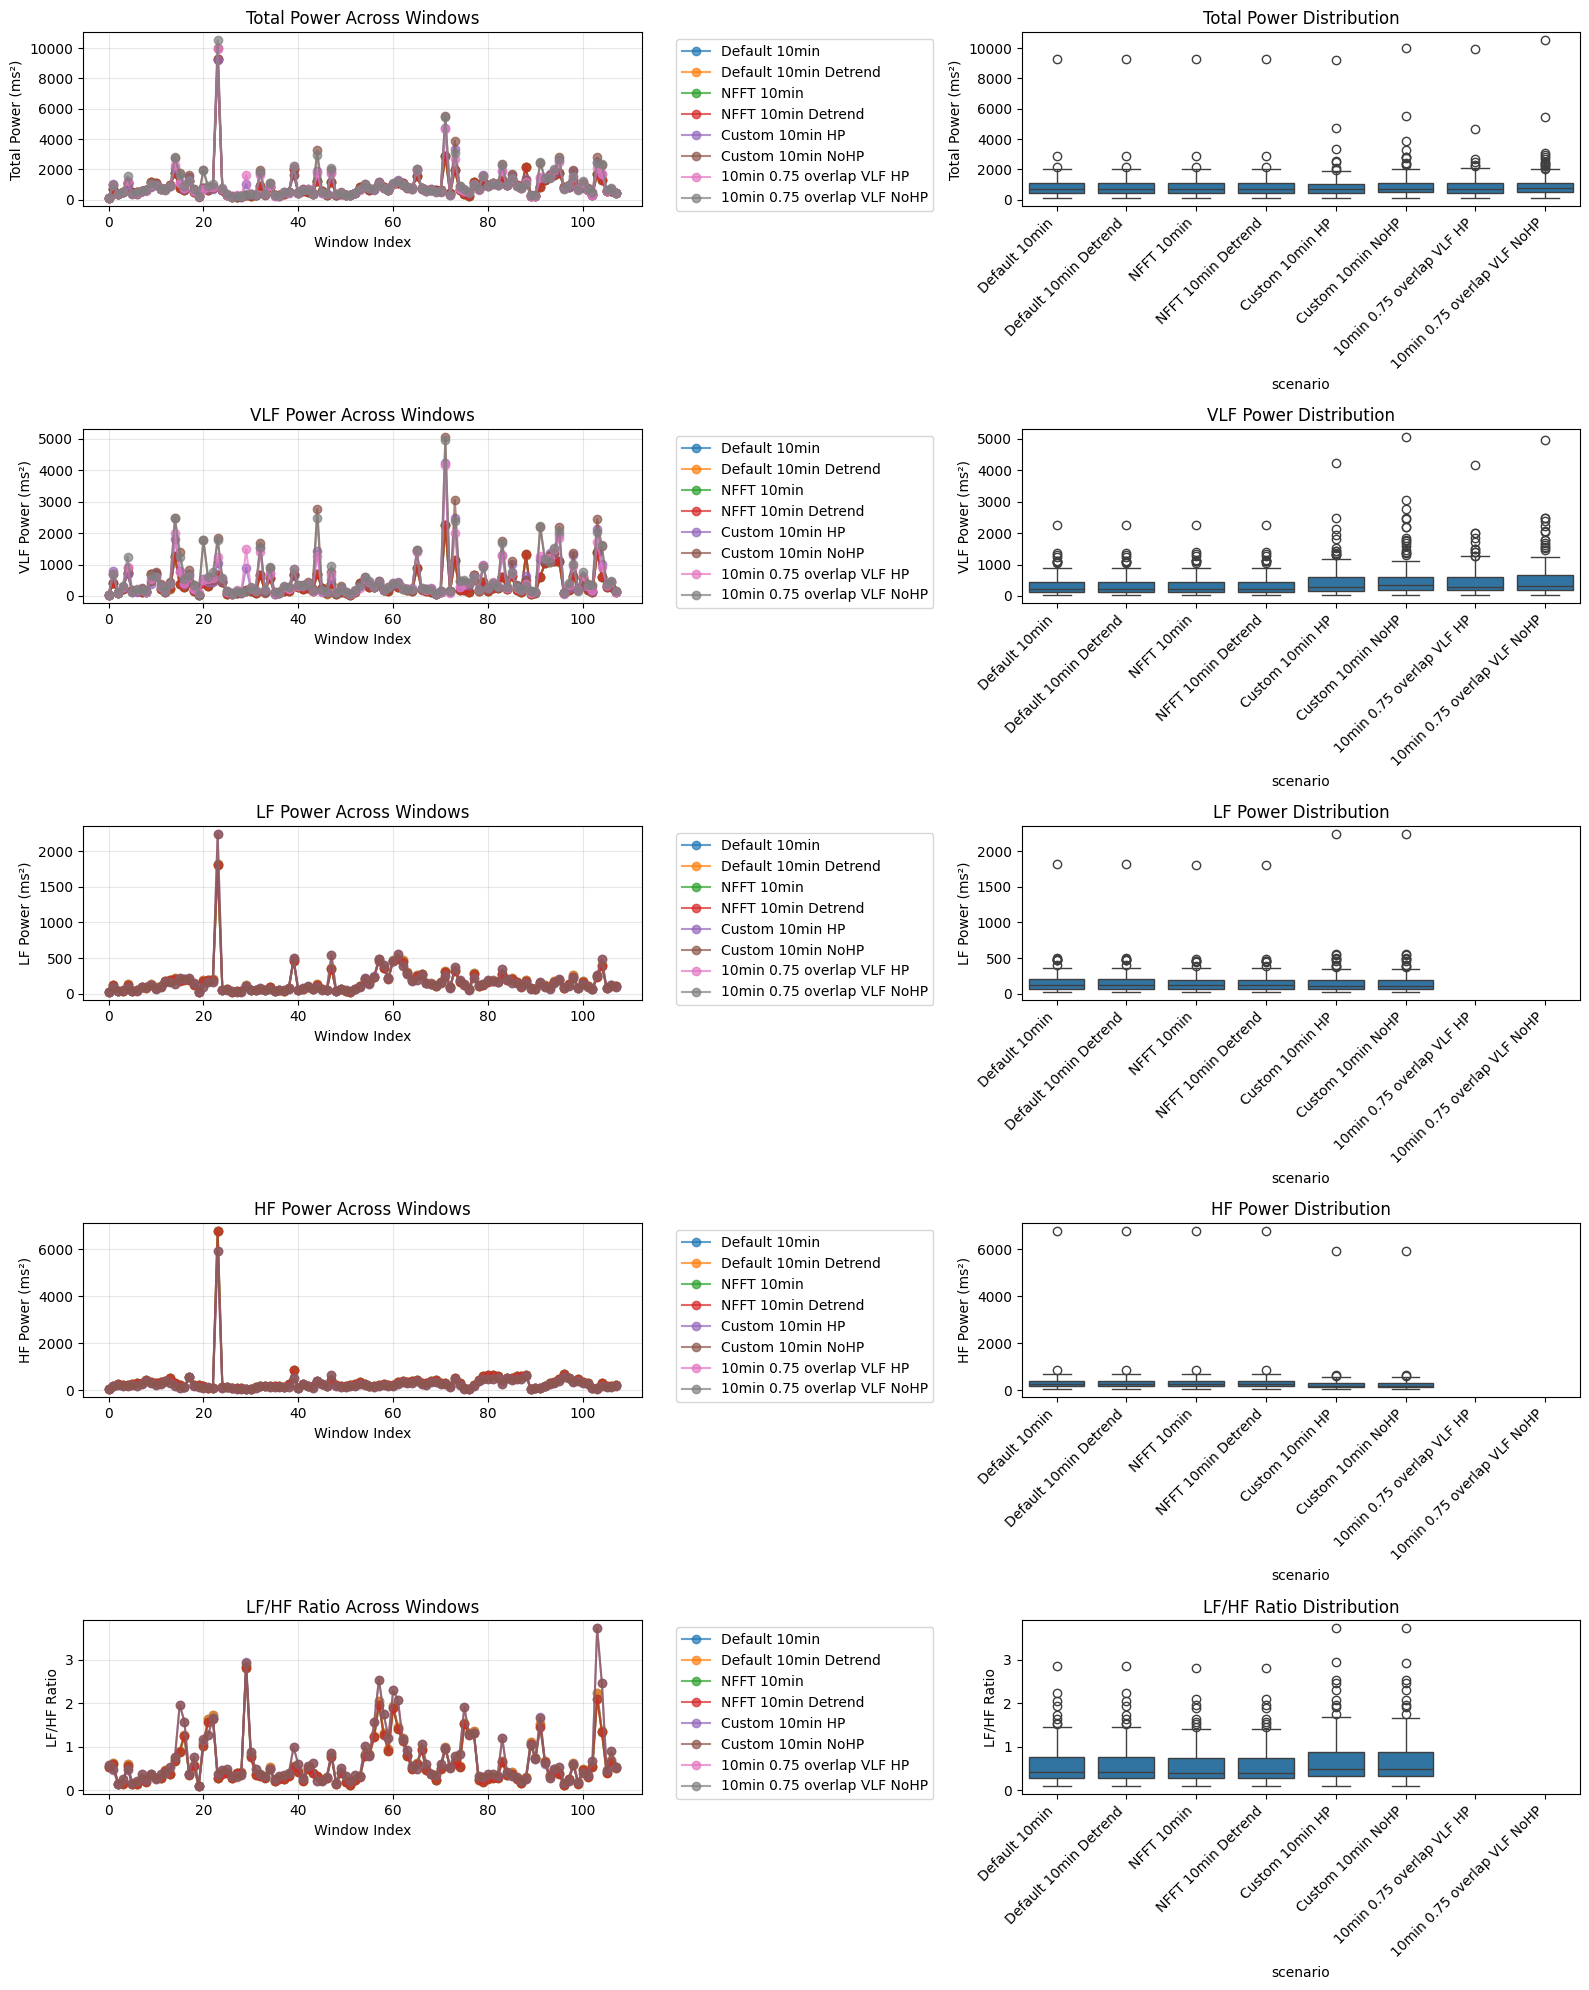

In [132]:
# Create comparison plots
plot_scenario_comparison(df_comparison)

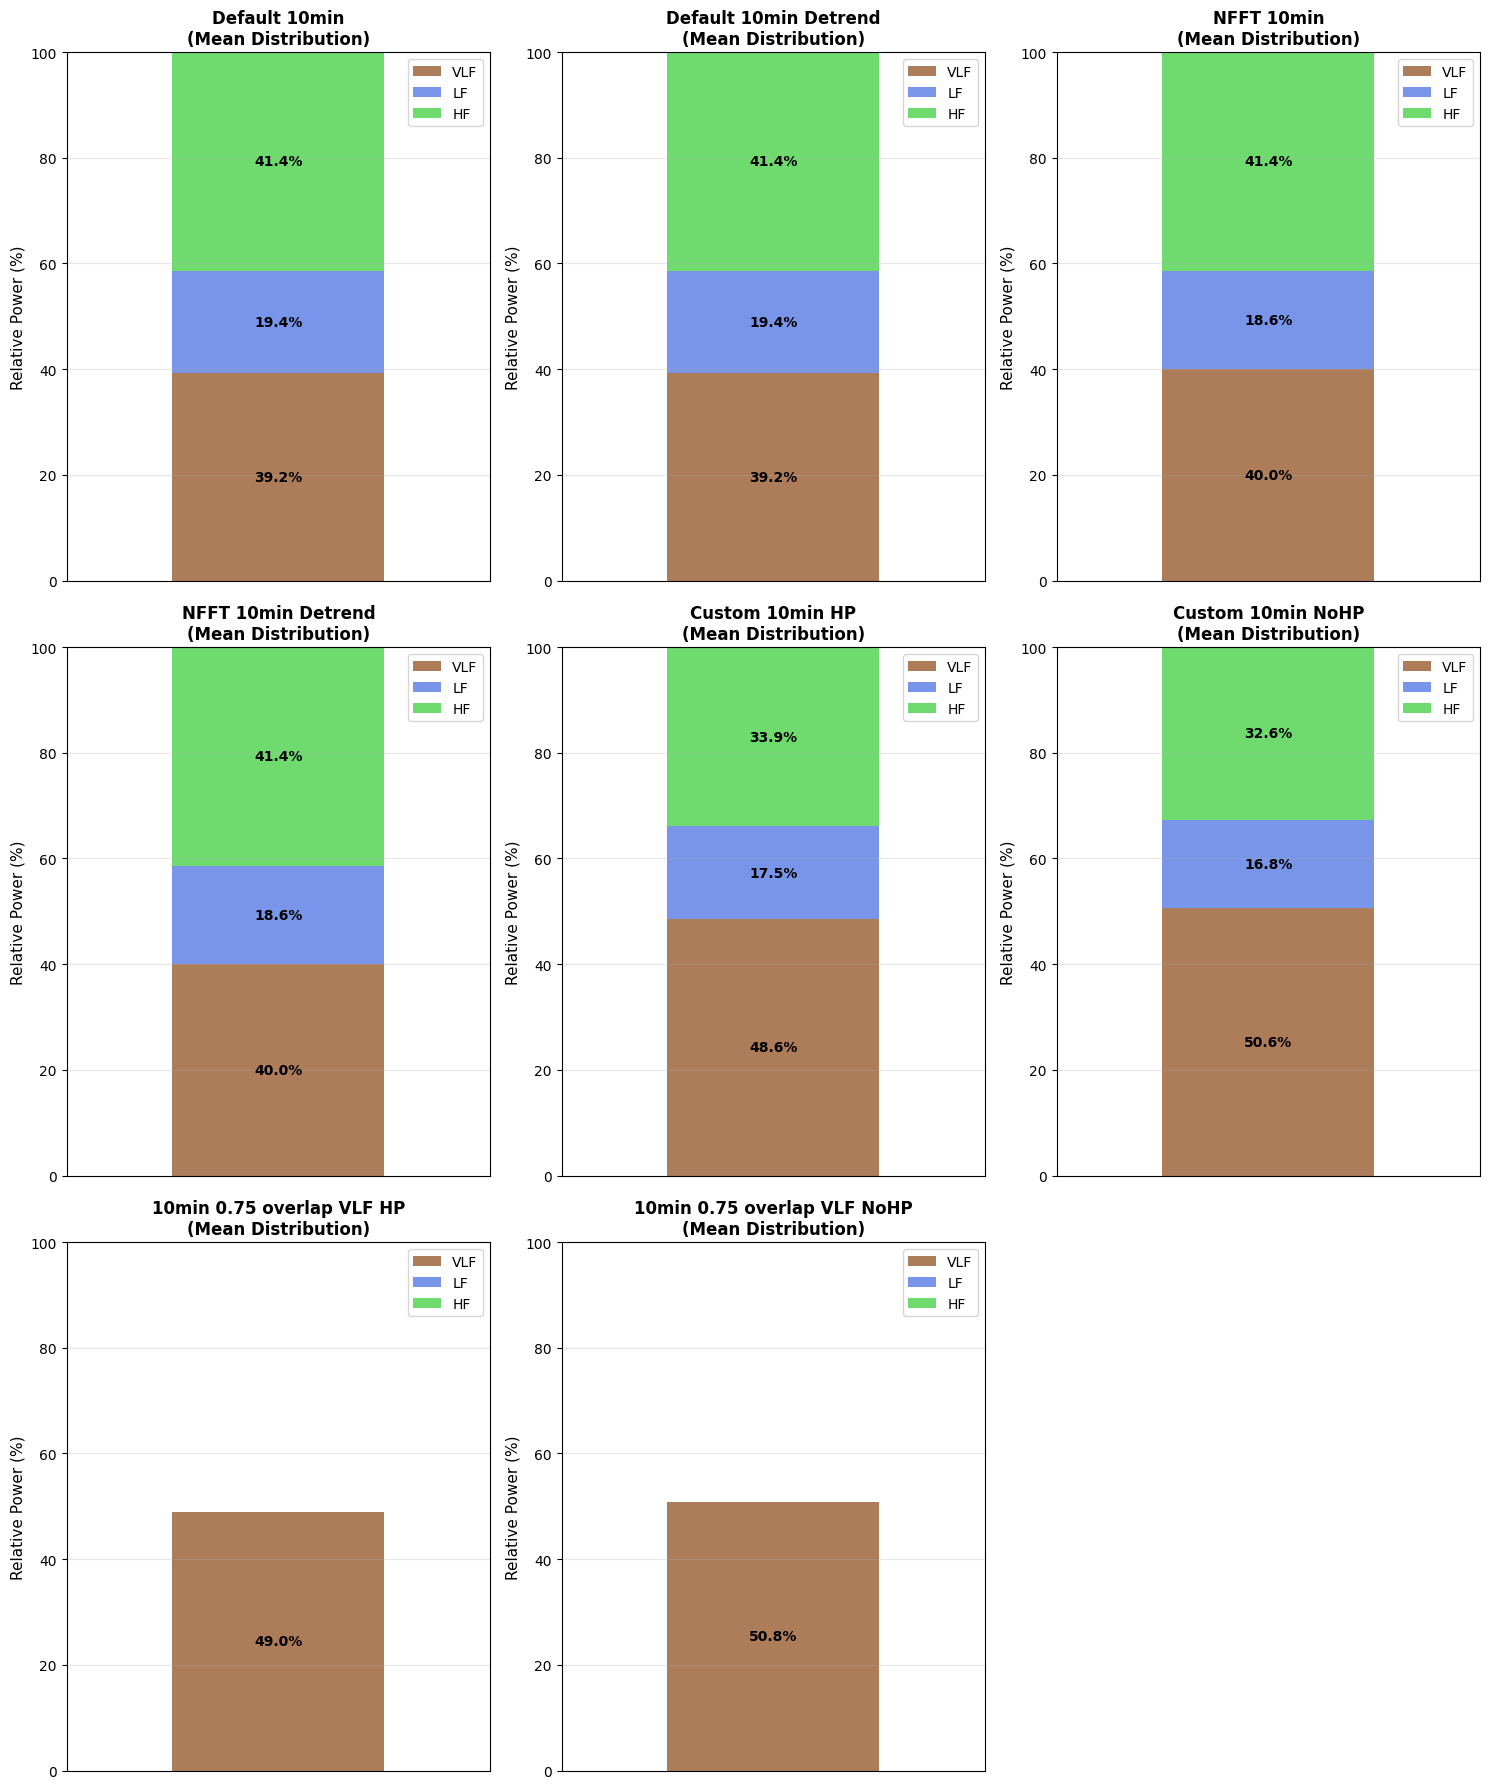

In [133]:
# Plot relative power distribution
plot_relative_power_comparison(df_comparison, max_cols=3)

In [115]:
results_comparison_5min = {
    'Default 5min': default_5_feats,
    'Default 5min Detrend': default_5_feats_detrend,
    'NFFT 5min': nfft_5_feats,
    'NFFT 5min Detrend': nfft_5_feats_detrend,
    'Custom 5min HP': results2,
    'Custom 5min NoHP': results3
}

# Convert to DataFrame
df_comparison_5min = extract_all_features_to_dataframe(results_comparison_5min)

In [121]:
print_summary_statistics(df_comparison_5min)

SUMMARY STATISTICS BY SCENARIO

Scenario: Default 5min
Number of windows: 217

Total Power (ms²):
  Mean: 1047.88
  Std:  1033.64
  Min:  81.06
  Max:  7457.75

VLF Power (ms²):
  Mean: 585.09 (44.8%)
  Std:  875.25

LF Power (ms²):
  Mean: 151.06 (16.1%)
  Std:  157.42

HF Power (ms²):
  Mean: 311.73 (39.0%)
  Std:  269.76

LF/HF Ratio:
  Mean: 0.68
  Std:  0.81

Scenario: Default 5min Detrend
Number of windows: 217

Total Power (ms²):
  Mean: 1047.88
  Std:  1033.64
  Min:  81.06
  Max:  7457.75

VLF Power (ms²):
  Mean: 585.09 (44.8%)
  Std:  875.25

LF Power (ms²):
  Mean: 151.06 (16.1%)
  Std:  157.42

HF Power (ms²):
  Mean: 311.73 (39.0%)
  Std:  269.76

LF/HF Ratio:
  Mean: 0.68
  Std:  0.81

Scenario: NFFT 5min
Number of windows: 217

Total Power (ms²):
  Mean: 1063.64
  Std:  1152.99
  Min:  80.95
  Max:  8838.87

VLF Power (ms²):
  Mean: 591.88 (43.7%)
  Std:  957.70

LF Power (ms²):
  Mean: 146.92 (15.7%)
  Std:  165.23

HF Power (ms²):
  Mean: 324.84 (40.6%)
  Std:  328.77

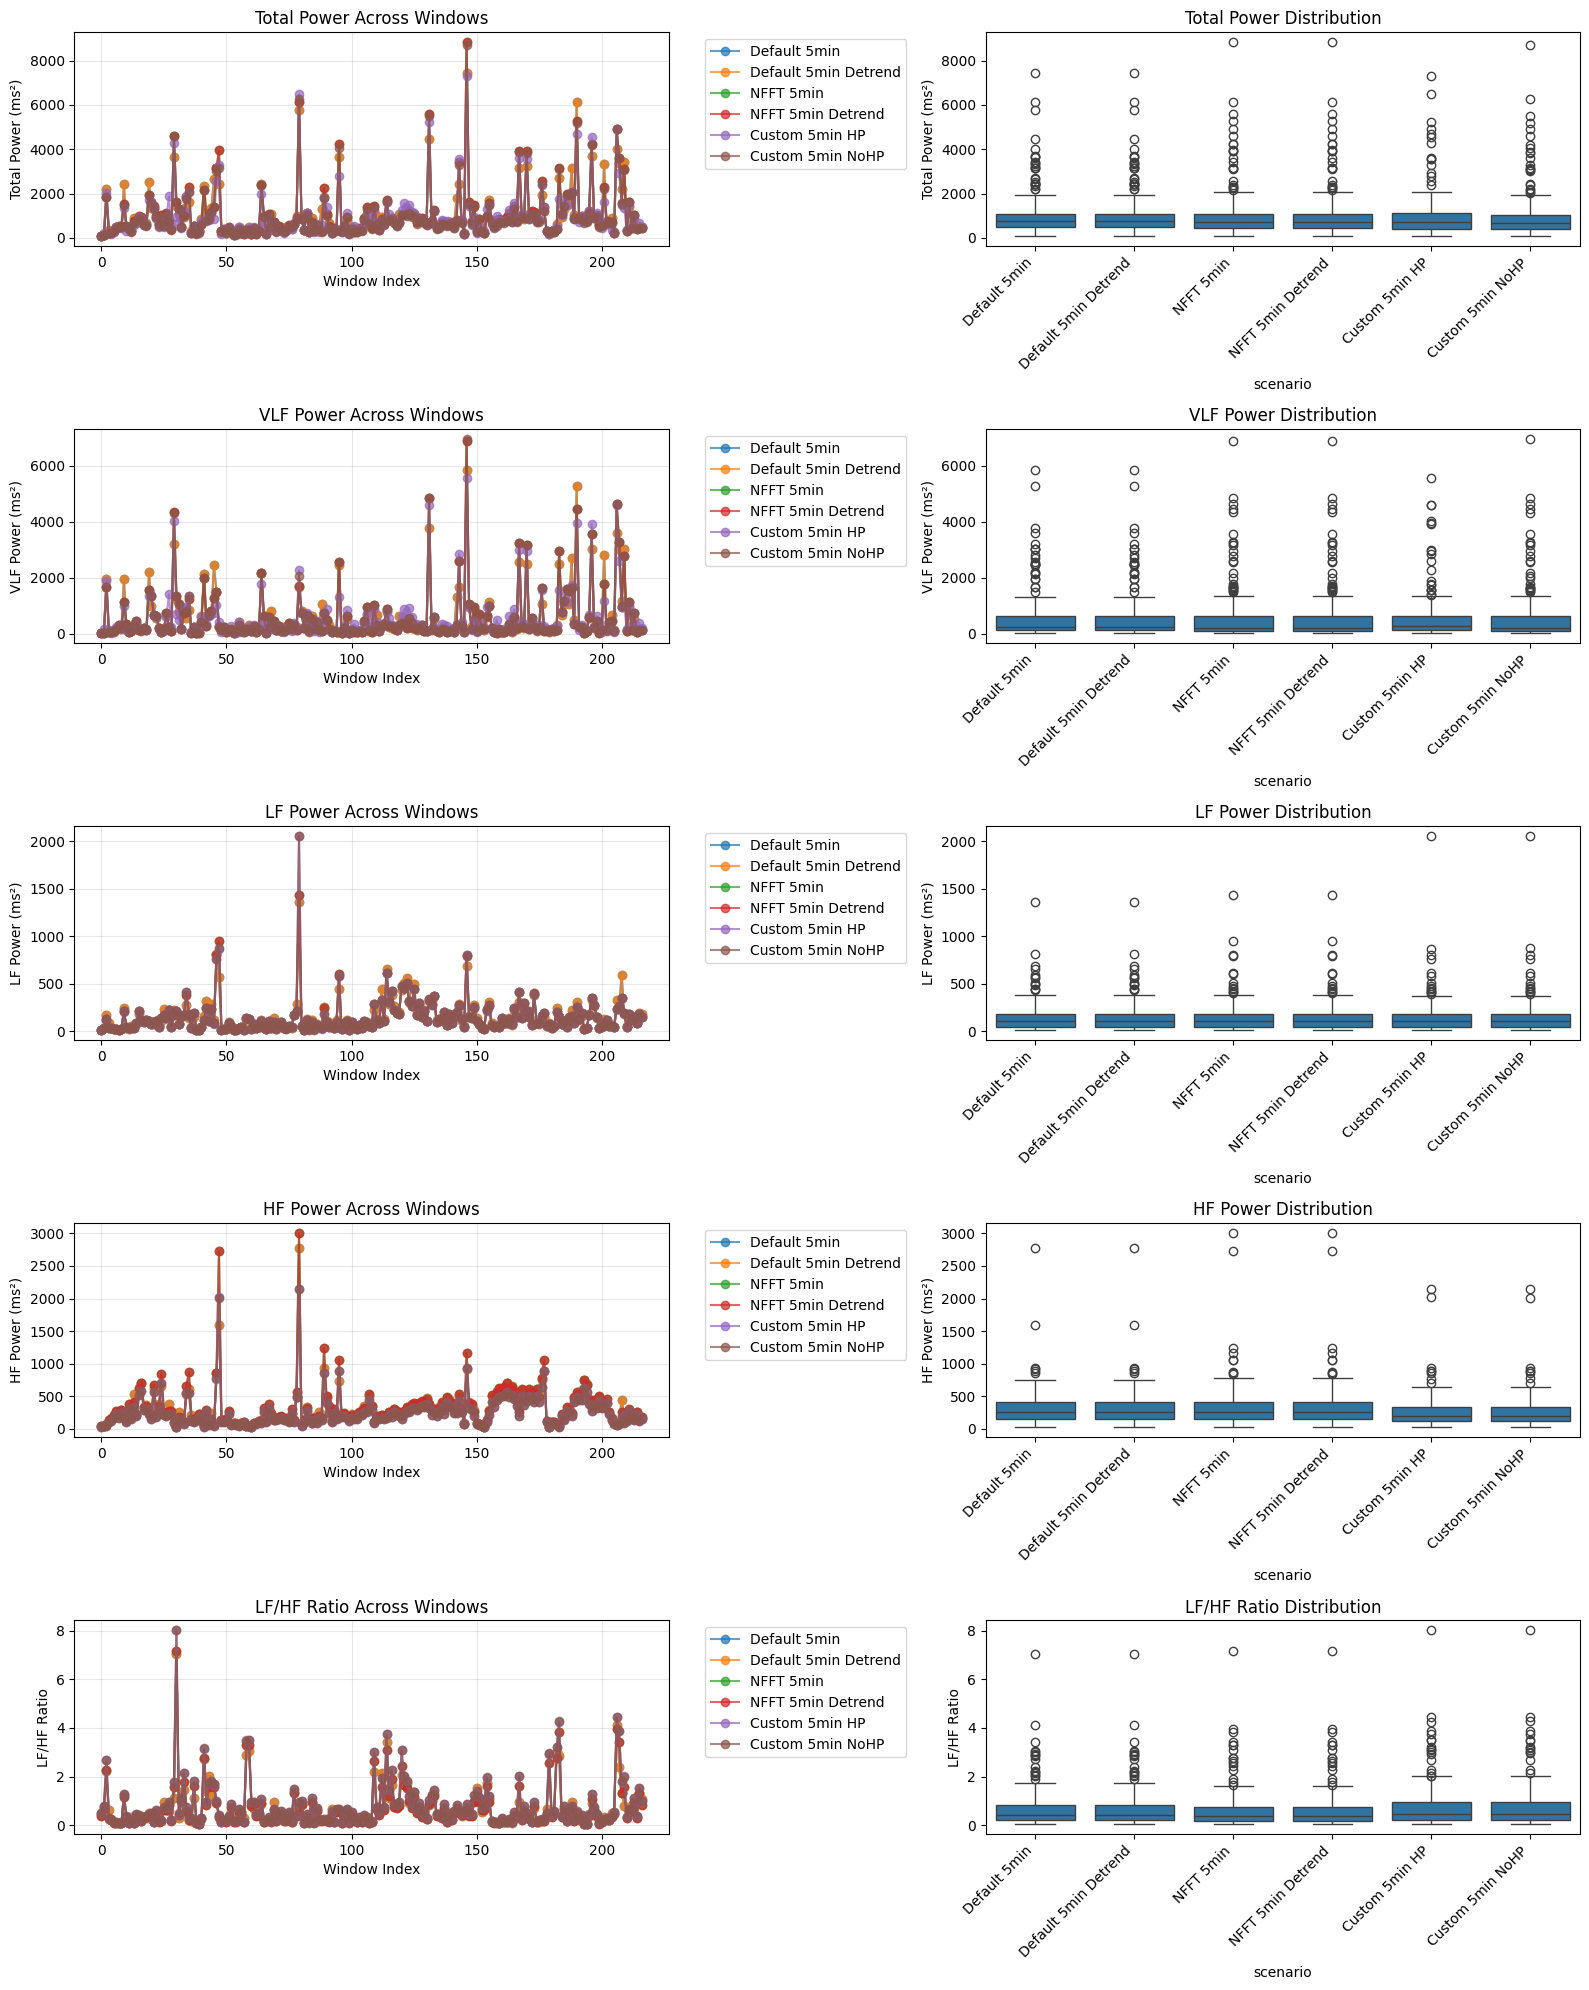

In [122]:
plot_scenario_comparison(df_comparison_5min)

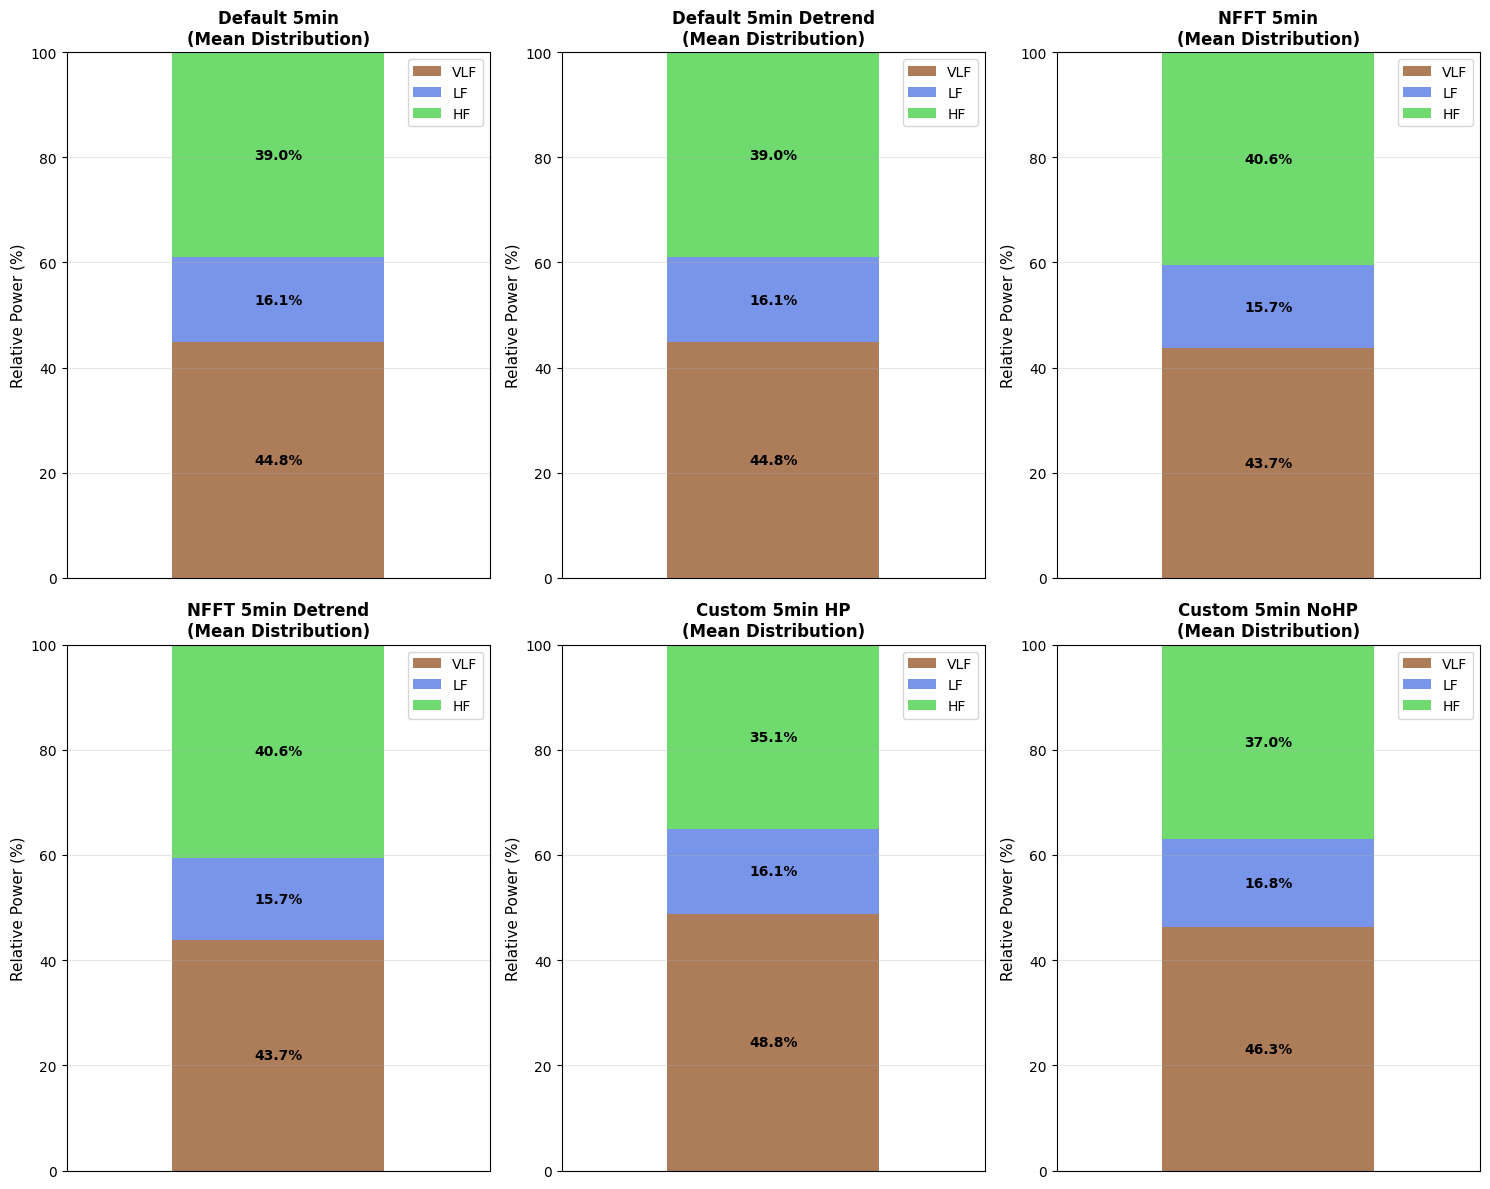

In [127]:
plot_relative_power_comparison(df_comparison_5min, max_cols=3)